# 1. Importar bibliotecas:

1) Se importa la biblioteca NetworkX como "nx" para trabajar con gráficos y redes.
2) Se importa la biblioteca Matplotlib.pyplot como "plt" para visualizar los gráficos.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import os

# 2. Definir la clase Activity:

1. Creamos una clase llamada Activity que representa una actividad en el proyecto.
2. Los atributos de la actividad incluyen su nombre, duración y una lista de actividades predecesoras.
3. También hay atributos para los tiempos tempranos (early) y tardíos (late) de inicio y finalización de la actividad.

In [2]:
class Activity:
    def __init__(self, name, duration, predecessors=[]):
        self.name = name
        self.duration = duration
        self.predecessors = predecessors
        self.early_start = 0
        self.early_finish = 0
        self.late_start = 0
        self.late_finish = 0

# 3. Función calculate_early_times(activities):

1. Calcula los tiempos tempranos de inicio y finalización de cada actividad en función de sus predecesoras.
2. Si una actividad no tiene predecesoras, su tiempo temprano de inicio es 0 y el tiempo temprano de finalización es su duración.
3. Si una actividad tiene predecesoras, su tiempo temprano de inicio es el tiempo temprano de finalización de la predecesora que termine más tarde, y su tiempo temprano de finalización se calcula sumando su duración al tiempo temprano de inicio.

In [3]:
def calculate_early_times(activities):
    for activity in activities:
        if not activity.predecessors:
            activity.early_start = 0
            activity.early_finish = activity.duration
        else:
            max_early_finish = 0
            for predecessor in activity.predecessors:
                if predecessor.early_finish > max_early_finish:
                    max_early_finish = predecessor.early_finish
            activity.early_start = max_early_finish
            activity.early_finish = max_early_finish + activity.duration

# 4. Función calculate_late_times(activities, project_duration):

1. Calcula los tiempos tardíos de inicio y finalización de cada actividad en función de sus sucesoras.
2. Si una actividad no tiene sucesoras, su tiempo tardío de finalización es la duración total del proyecto y el tiempo tardío de inicio es el tiempo tardío de finalización menos su duración.
3. Si una actividad tiene sucesoras, su tiempo tardío de finalización es el tiempo tardío de inicio de la sucesora que inicie más temprano, y su tiempo tardío de inicio se calcula restando su duración al tiempo tardío de finalización.

In [4]:
def calculate_late_times(activities, project_duration):
    for activity in activities:
        if not activity.predecessors:
            activity.late_finish = project_duration
            activity.late_start = project_duration - activity.duration
        else:
            min_late_start = project_duration
            for successor in activities:
                if activity in successor.predecessors:
                    if successor.late_start < min_late_start:
                        min_late_start = successor.late_start
            activity.late_finish = min_late_start
            activity.late_start = min_late_start - activity.duration

# 5. Función find_critical_path(activities):

1. Encuentra la ruta crítica, que son las actividades con tiempos tempranos y tardíos de inicio iguales.
2. Construye una lista de nombres de actividades que pertenecen a la ruta crítica y la devuelve.

In [5]:
def find_critical_path(activities):
    critical_path = []
    for activity in activities:
        if activity.early_start == activity.late_start:
            critical_path.append(activity.name)
    return critical_path

# 6. Función draw_activity_graph(activities, title, color):

1. Crea y dibuja un gráfico de actividades utilizando la biblioteca NetworkX y Matplotlib.
2. Cada nodo representa una actividad y se etiqueta con su nombre, tiempos tempranos/tardíos de inicio y finalización.
3. Las conexiones entre actividades se representan con bordes en el gráfico.
4. Los nodos se colocan en una disposición utilizando el algoritmo de resorte de NetworkX.

In [6]:
def draw_activity_graph(activities, title, color):
    G = nx.DiGraph()
    labels = {}

    for activity in activities:
        G.add_node(activity.name)
        labels[activity.name] = f"{activity.name}\n{activity.early_start}/{activity.early_finish}\n{activity.late_start}/{activity.late_finish}"

        for predecessor in activity.predecessors:
            G.add_edge(predecessor.name, activity.name)

    pos = nx.spring_layout(G, seed=42)  # Positions nodes for better layout

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color=color, font_size=10, font_color="black", font_weight="bold")
    nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color="black")

    plt.title(title)
    plt.show()

# 7.Función main():

1. Define una lista de actividades, donde cada actividad se crea como un objeto de la clase Activity.
2. Se establecen las dependencias entre actividades (predecesoras) mediante la asignación de la lista de predecesoras a cada actividad.
3. Calcula los tiempos tempranos de inicio y finalización de las actividades.
4. Calcula la duración total del proyecto como el máximo tiempo temprano de finalización entre todas las actividades.
5. Calcula los tiempos tardíos de inicio y finalización de las actividades.
6. Encuentra la ruta crítica.
7. Imprime los tiempos de inicio y finalización tempranos y tardíos de cada actividad.
8. Dibuja tres gráficos: recorrido temprano, recorrido tardío y ruta crítica.

In [7]:
def main():
    activities = [
        Activity("A", 3),
        Activity("B", 2),
        Activity("C", 5),
        Activity("D", 4),
        Activity("E", 2),
        Activity("F", 3),
        Activity("G", 6),
        Activity("H", 4),
        Activity("I", 2),
        Activity("J", 4)
    ]
    
    activities[1].predecessors = [activities[0]]  # Actividad B depende de A
    activities[2].predecessors = [activities[0]]  # Actividad C depende de A
    activities[3].predecessors = [activities[1]]  # Actividad D depende de B
    activities[4].predecessors = [activities[1]]  # Actividad E depende de B
    activities[5].predecessors = [activities[2]]  # Actividad F depende de C
    activities[6].predecessors = [activities[2]]  # Actividad G depende de C
    activities[7].predecessors = [activities[3], activities[4]]  # Actividad H depende de D y E
    activities[8].predecessors = [activities[5]]  # Actividad I depende de F
    activities[9].predecessors = [activities[6], activities[7], activities[8]]  # Actividad J depende de G, H e I

    calculate_early_times(activities)
    project_duration = max(activity.early_finish for activity in activities)
    calculate_late_times(activities, project_duration)
    critical_path = find_critical_path(activities)

    print("Actividades y sus tiempos de inicio/fin tempranos/tardíos:")
    for activity in activities:
        print(f"{activity.name}: ES={activity.early_start}, EF={activity.early_finish}, LS={activity.late_start}, LF={activity.late_finish}")

    # Dibujar recorrido temprano
    draw_activity_graph(activities, "Recorrido Temprano", "skyblue")

    # Dibujar recorrido tardío
    draw_activity_graph(activities, "Recorrido Tardío", "lightgreen")
    print("\nRuta Critica:")
    print(" -> ".join(critical_path))

    # Dibujar ruta crítica
    critical_activities = [activity for activity in activities if activity.name in critical_path]
    draw_activity_graph(critical_activities, "Ruta Crítica", "red")


# 8.La ejecución condicional if __name__ == "__main__"

Asegura que el código en la función main() solo se ejecute cuando el archivo se ejecute directamente y no cuando se importe como un módulo en otro programa.

Actividades y sus tiempos de inicio/fin tempranos/tardíos:
A: ES=0, EF=3, LS=15, LF=18
B: ES=3, EF=5, LS=-2, LF=0
C: ES=3, EF=8, LS=-5, LF=0
D: ES=5, EF=9, LS=-4, LF=0
E: ES=5, EF=7, LS=-2, LF=0
F: ES=8, EF=11, LS=-3, LF=0
G: ES=8, EF=14, LS=-6, LF=0
H: ES=9, EF=13, LS=-4, LF=0
I: ES=11, EF=13, LS=-2, LF=0
J: ES=14, EF=18, LS=14, LF=18


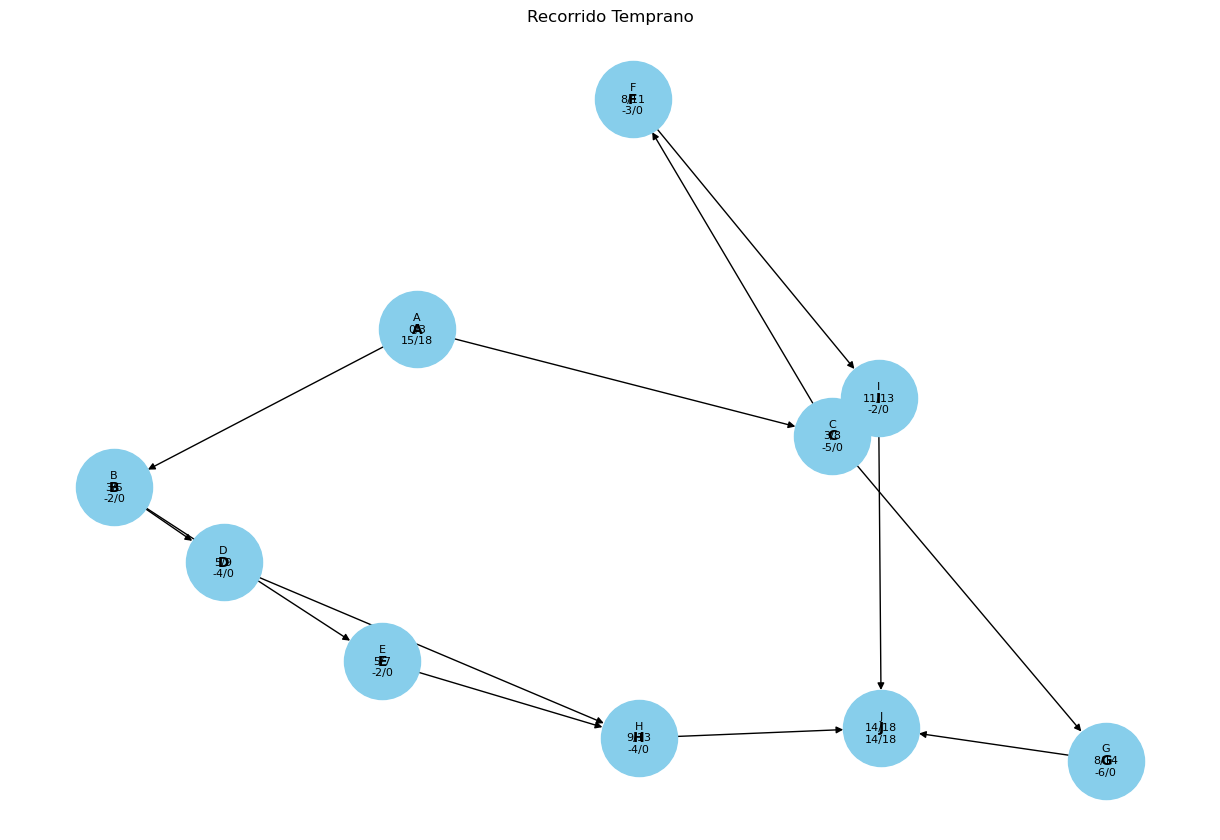

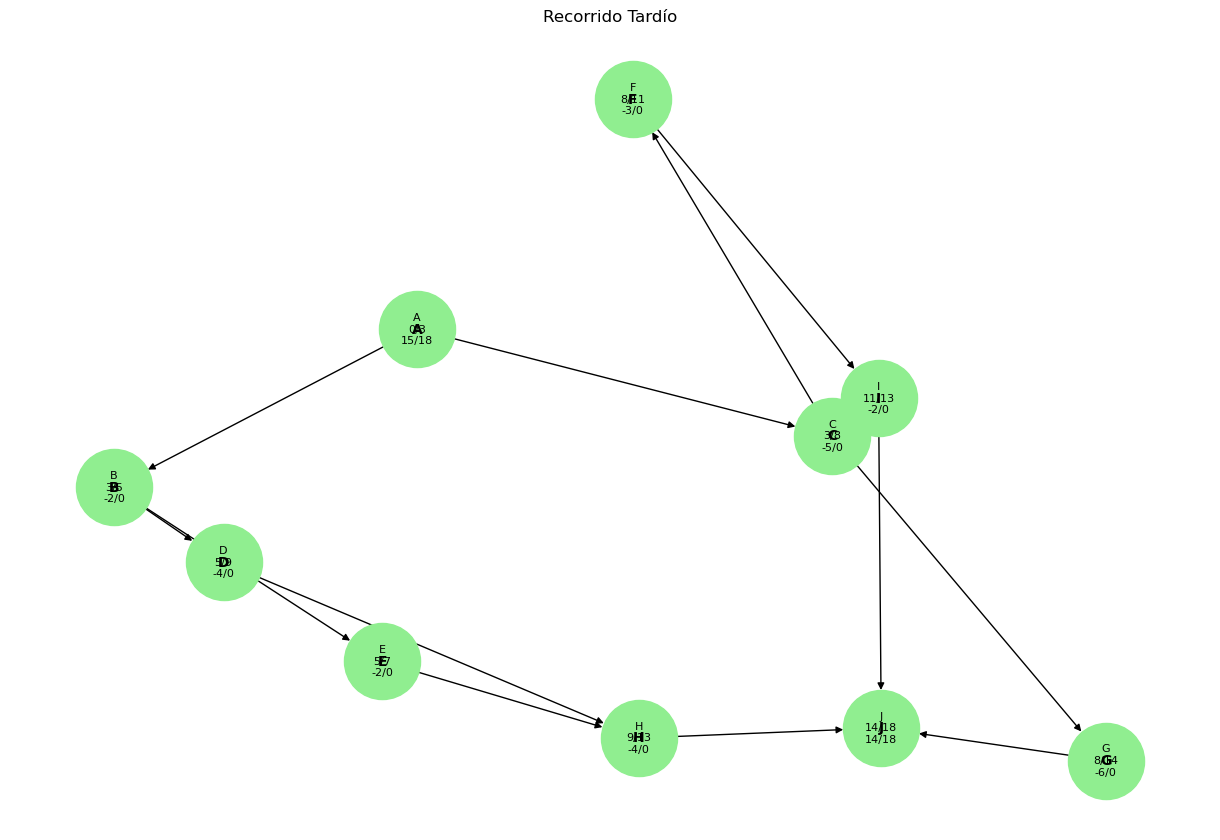


Ruta Critica:
J


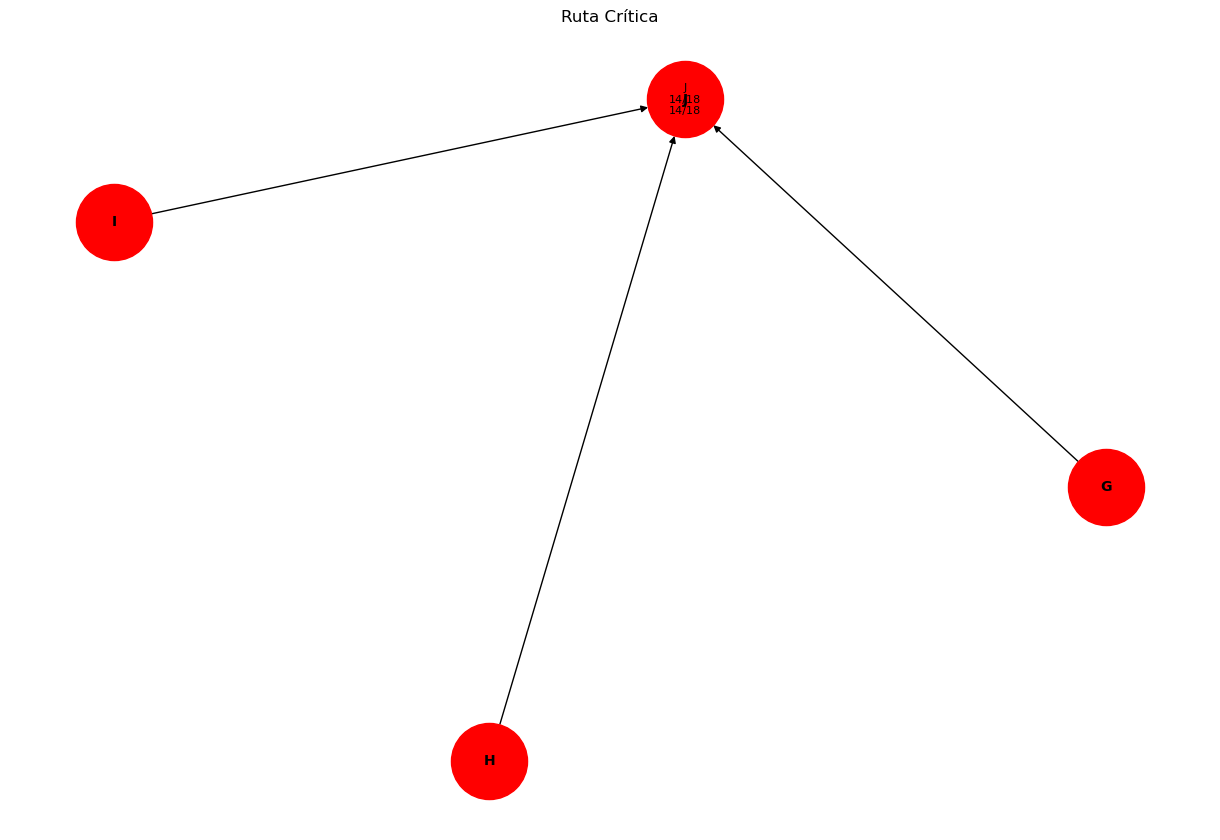

In [8]:
if __name__ == "__main__":
    main()